In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("Expanded_data_with_more_features.csv")

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  

In [5]:
df.info

<bound method DataFrame.info of        Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  Nr

In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop unnamed column

In [7]:
df = df.drop("Unnamed: 0",axis =1)

# gender distribution

<function matplotlib.pyplot.show(close=None, block=None)>

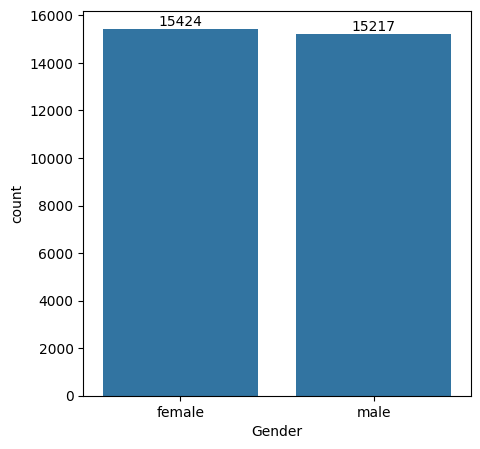

In [8]:
plt.figure(figsize = (5,5))
ax=sns.countplot(data = df , x= "Gender")
ax.bar_label(ax.containers[0])
plt.show

In [9]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


<Axes: ylabel='ParentEduc'>

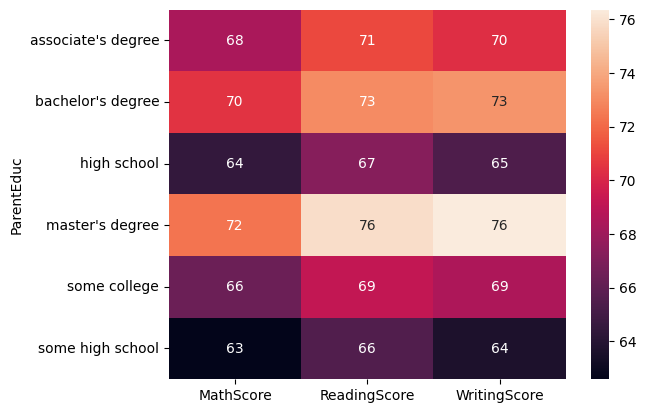

In [10]:
sns.heatmap(gb,annot = True)

In [11]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


Text(0.5, 1.0, "Relationship btw parent's Marital status and Student's score")

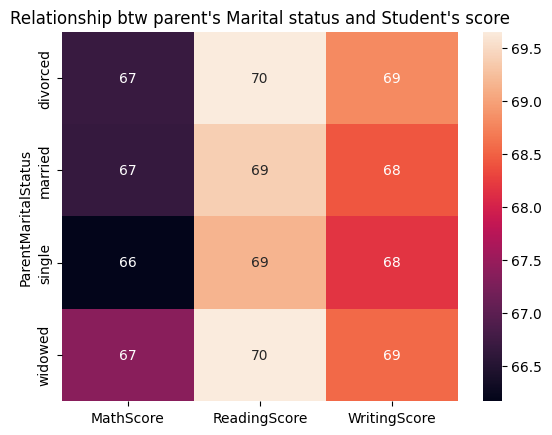

In [12]:
sns.heatmap(gb1,annot = True)
plt.title("Relationship btw parent's Marital status and Student's score")

<Axes: xlabel='MathScore'>

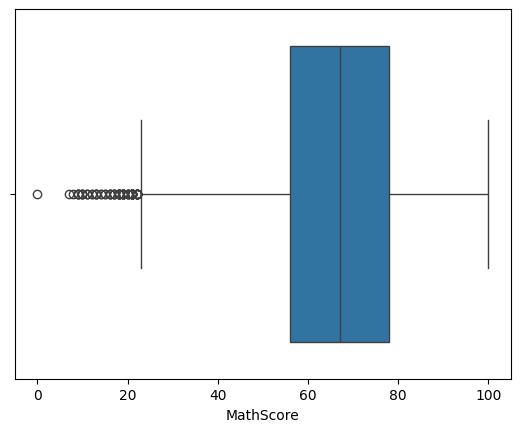

In [13]:
sns.boxplot(data = df ,x="MathScore")

<Axes: xlabel='WritingScore'>

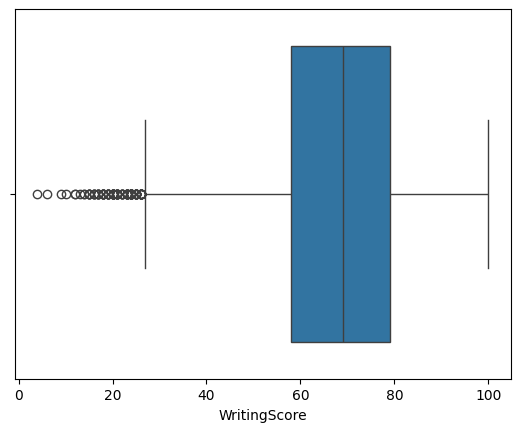

In [14]:
sns.boxplot(data = df ,x="WritingScore")

In [15]:
df["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

# DISTRIBUTION OF ETHINC GROUPS

([<matplotlib.patches.Wedge at 0x1fb85040c20>,
 [Text(1.0679343156670604, 0.2636594345376768, 'group A'),
  Text(0.47965667034074383, 0.9899138743333337, 'group B'),
  Text(-1.0208490144326958, 0.4097161087043003, 'group C'),
  Text(-0.1417295852362736, -1.0908312081476006, 'group D'),
  Text(0.9948566006880766, -0.4693190216338617, 'group E')],
 [Text(0.5825096267274875, 0.143814237020551, '7.70%'),
  Text(0.2616309110949511, 0.5399530223636365, '20.23%'),
  Text(-0.5568267351451067, 0.22348151383870926, '31.99%'),
  Text(-0.07730704649251287, -0.5949988408077821, '26.05%'),
  Text(0.542649054920769, -0.25599219361847, '14.03%')])

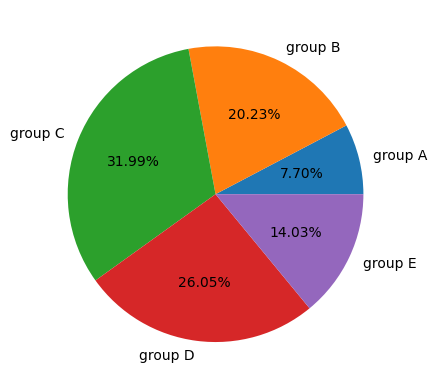

In [16]:
group1 = df.loc[(df["EthnicGroup"] == "group A")].count()
group2 = df.loc[(df["EthnicGroup"] == "group B")].count()
group3 = df.loc[(df["EthnicGroup"] == "group C")].count()
group4 = df.loc[(df["EthnicGroup"] == "group D")].count()
group5 = df.loc[(df["EthnicGroup"] == "group E")].count()
l =["group A","group B","group C","group D","group E"]
nlist = [group1["EthnicGroup"],group2["EthnicGroup"],group3["EthnicGroup"],group4["EthnicGroup"],group5["EthnicGroup"]]
plt.pie(nlist , labels = l , autopct = "%1.2f%%")
